# Telco Customer Churn
* Model
* Cross Validation
* Ensemble
* Results

## Importing Packages

In [1]:
# importing libraries
import numpy as np ## linear algebra
import pandas as pd ## data processing, pd.read_csv("")

# visualization
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Data Structure

In [2]:
# checking directory
import os
os.getcwd()

# ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data processing
import pandas as pd
import numpy as np
df = pd.read_csv("Telco.csv")
display(df.head(20).T)
df.info()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,0280-XJGEX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4190-MFLUW,4183-MYFRB
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Male,Female,Female
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No
tenure,1,34,2,45,2,8,22,10,28,62,13,16,58,49,25,69,52,71,10,21
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,No,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,DSL,No,Fiber optic,Fiber optic,Fiber optic,Fiber optic,No,Fiber optic,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No internet service,No,No,Yes,Yes,No internet service,Yes,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.isnull().sum()
## just in case checking with isnull().sum()
## no null values in all variables in Telco

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* 확인해보니 TotalCharges 에서 NaN 값이 나오는 사람들은 tenure 값도 0 이었다.
    * 그 말인 즉슨, 이제 막 계약한 사람들이여서 TotalCharges 값을 정산할 수 없다
    * NaN 값 안날릴라고 0 넣어보고 NaN 값에 MonthlyCharges 값도 넣어줬는데 그냥 다 빼버리는게 제일 결과가 좋게 나와서 빼기로 결심

# Data Manipulation

In [5]:
# replacing spaces with null values in total charges column
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
## use df.isnull() to detect null values (differenet from NaN)
## unlike R, Python doesn't automatically recognize blank spaces or " " as missing values, therefore you must define " " as NaN or 0 or mean (just like processing with missing values)
## can finally detect null values using df.info()

# dropping null values
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

# converting TotalCharges to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

# replacing values that contains "No" as "No" for the following columns
replace_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

for i in replace_cols :
    df[i] = df[i].replace({"No internet service" : "No"})

for i in replace_cols:
    df[i] = df[i].replace({"No phone service" : "No"})

# changing tenure as categorical values since the values are continuous - converting months to years
def tenure_bin(df) :
    if df["tenure"] <= 12 :
        return "0-1 years"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24) :
        return "1-2 years"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) :
        return "2-3 years"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48) :
        return "3-4 years"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "4-5 years"
    elif (df["tenure"] > 60) & (df["tenure"] <= 72) :
        return "5-6 years"
df["tenure_bin"] = df.apply(lambda df:tenure_bin(df), axis=1)

# splitting MonthlyCharges to qcut
df["mc_bin"] = pd.qcut(df["MonthlyCharges"], 4, labels = range(1,5))
df["mc_bin"]

# changing SeniorCitizen 1 and 0 to "Yes" and "No"
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

def Senior(df) :
    if df["SeniorCitizen"] == 1:
        return "Yes"
    else :
        return "No"
df["SeniorCitizen"] = df.apply(lambda df:Senior(df), axis=1)

# separating categorical and numerical columns
df_id = ["customerID"]
df_target = ["Churn"]
df_cat = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "tenure_bin", "mc_bin"]
df_num = ["tenure", "MonthlyCharges", "TotalCharges"]

# separating Churn and Retained for plotting
churn = df[df["Churn"] == "Yes"]
retained = df[df["Churn"] == "No"]

* tenure 값을 binning 했을 때 결과값이 좋아서 tenure 값에 이어 FeatureImportance 에서 제일 중요한 변수였던 MonthlyCharges 를 사분위수로 binning
    * `pd.qcut()` 함수 사용
* 혹시나해서 TotalCharges 도 binning 해봤는데 오히려 결과값이 더 좋지 않게 나왔음

# Data Visualization

In [6]:
# data visualization
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Churn

### Total Customers

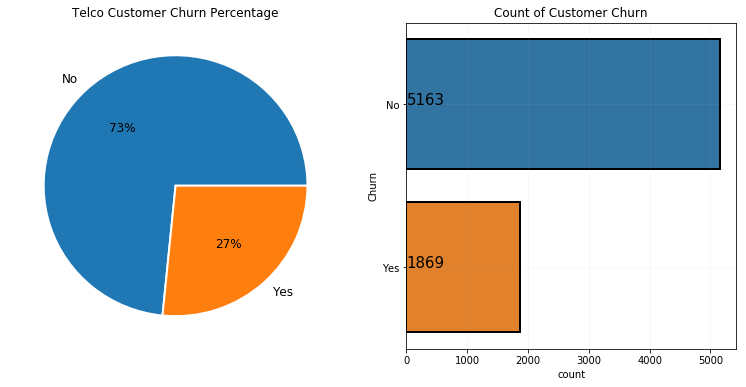

In [7]:
plt.figure(figsize=(13,6))
plt.subplot(121)
df["Churn"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Telco Customer Churn Percentage")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = df["Churn"],linewidth = 2,
                   edgecolor = "k"*df["Churn"].nunique())
for i,j in enumerate(df["Churn"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Count of Customer Churn")
plt.grid(True,alpha = .1)
    
plt.show()

### Customer Attributes

In [8]:
# function for pie plot attributes
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = retained[column].value_counts().values.tolist(),
                    labels  = retained[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Retained" 
                   )


    layout = go.Layout(dict(title = column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Retained",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

# function for histogram for customer attributes
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = retained[column],
                          histnorm = "percent",
                          name = "Retained",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [9]:
# plotting plot pie for df_cat
for i in df_cat :
    plot_pie(i)


In [10]:
# plotting histogram for df_num
for i in df_num :
    histogram(i)

### Tenure Years

In [11]:
# customer attribute: tenure_bin
tg_ch  =  churn["tenure_bin"].value_counts().reset_index()
tg_ch.columns  = ["tenure_bin","count"]
tg_re =  retained["tenure_bin"].value_counts().reset_index()
tg_re.columns = ["tenure_bin","count"]

# bar for Churn
trace1 = go.Bar(x = tg_ch["tenure_bin"]  , y = tg_ch["count"],
                name = "Churn",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

# bar for Retained
trace2 = go.Bar(x = tg_re["tenure_bin"] , y = tg_re["count"],
                name = "Retained",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Churn per Tenure Years",
                        plot_bgcolor  = "rgb(243,243,243)",paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "Tenure",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "Count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

###  Average Charges by Tenure
* Average Monthly Charges
* Average Total Charges

In [12]:
avg_tgc = df.groupby(["tenure_bin","Churn"])[["MonthlyCharges","TotalCharges"]].mean().reset_index()

# function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = avg_tgc[avg_tgc["Churn"] == aggregate]["tenure_bin"],
                    y = avg_tgc[avg_tgc["Churn"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Churn"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                        plot_bgcolor  = "rgb(243,243,243)",paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
    return layout
    

# plot1: Average Monthly Charges by Tenure
trace1  = mean_charges("MonthlyCharges","Yes")
trace2  = mean_charges("MonthlyCharges","No")
layout1 = layout_plot("Average Monthly Charges by Tenure",
                      "Tenure","Monthly Charges")
data1 = [trace1,trace2]
fig1 = go.Figure(data = data1,layout = layout1)

# plot2: Average Total Charges by Tenure
trace3  = mean_charges("TotalCharges","Yes")
trace4  = mean_charges("TotalCharges","No")
layout2 = layout_plot("Average Total Charges by Tenure",
                      "Tenure","Total Charges")
data2 = [trace3,trace4]
fig2 = go.Figure(data=data2,layout=layout2)

py.iplot(fig1)
py.iplot(fig2)

# Data Pre-Processing

In [13]:
# data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
# separating binary and multivalue df_cat 

# binary
bin_cat = df.nunique()[df.nunique() == 2].keys().tolist()

# multivalue
mult_cat = [i for i in df_cat if i not in bin_cat]

# one-hot encoding bin_cat
le = LabelEncoder()
for i in bin_cat :
    df[i] = le.fit_transform(df[i])

# making dummies for multivalue columns
df = pd.get_dummies(data = df, columns = mult_cat)
## should initiate only once since after the process since the column names will change

In [15]:
# scale numeric columns
std = StandardScaler()
scaled = std.fit_transform(df[df_num])
scaled = pd.DataFrame(scaled, columns = df_num)

# preserving original dataframe before applying scaling
df_org = df.copy()

# applying scaled numeric values to original columns
df = df.drop(columns = df_num, axis = 1)
df = df.merge(scaled, left_index = True, right_index = True, how = "left")

* 데이터 전처리
    * NaN 값 날려버리기
    * tenure & MonthlyCharges binning
        * tenure 는 month 값을 years 로 나눴다 (0-1년부터 5-6년까지)
        * MonthlyCharges 는 qcut 함수 사용해서 사분위수로 나눠준다 (1~4)
    * categorical value 를 binary 랑 multivalue 로 나눠서 각자 숫자값으로 encoding 과 dummy 변수를 생성
        * binary 는 0 과 1 로 encoding, multivalue 는 dummy
    * numeric 값 변수 (tenure, MonthlyCharges, TotalCharges) 는 값이 서로 튀지 않도록 scaling 해서 적용
    * "Yes" 와 "No" 로 두 값이 들어간 항목들을 replace 사용해서 바꿈
        * binary 로 나중에 encoding 하기 위해서
    * SeniorCitizen "Yes" 와 "No" 를 0과 1로 바꿔줌
    
      
    

# EDA

## Variable Summary

In [16]:
summary = (df_org[[i for i in df_org.columns if i not in df_id]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary["feature"], summary["count"],
           summary["mean"],summary["std"],
           summary["min"], summary["25%"],
           summary["50%"], summary["75%"], summary["max"]]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ["#506784"]),
                                fill = dict(color = ["#119DFF"]),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ["#506784"]),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

* 표를 봤을때 TotalCharges 와 MonthlyCharges 가 표준오차가 커서 더 세분화되게 binning 해주면 값이 잘 나오지 않을까?
    * TotalCharges 는 안하느니만 못했음
    * MonthlyCharges 는 사분위수로 구분

## Correlation Matrix

In [17]:
# finding correlation between numeric values
corr = df.corr()

# labeling ticks
matrix_cols = corr.columns.tolist()

# converting to array
corr_array  = np.array(corr)

# plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Bluered",
                   colorbar   = dict(title = "Pearson Correlation Coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Telco Correlation Matrix",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

* 서로 corrleation 이 높은 값들은 multicollinearity 를 방지하기 위해 떨구고 싶었는데 뭔가 R에 비해 검사하기 조금 까다로운 거 같음
    * p-value 나 VIF 사용하는 방법?

* will check additional multicollinearity via VIF and p-value after running a quick linear model
    * to drop useless variables
    * easy process in R, but seems like Python really doesn't care about these statistical values

## Final Data
* Final processed data = `df`
* Original data before scaling = `df_org`

# Cross Validation

In [18]:
# random sampling dataset
from sklearn.model_selection import train_test_split

In [19]:
# drop customerID
df = df.drop(["customerID"], axis=1)

# splitting to train and test
train_df, test_df = train_test_split(df,test_size=0.2,random_state=0)
train_df = train_df.reset_index().drop("index",axis=1) 
test_df = test_df.reset_index().drop("index",axis=1) 
print(len(df))
print(len(train_df))
print(len(test_df))

7032
5625
1407


In [20]:
# in reality, you can get only data of "train" and "test set without dependent variables"

# both do NOT contain "answers" aka "target variables"
latent_y = test_df[["Churn"]]

# contains answer
test_df = test_df.drop(["Churn"],axis=1)

# testing performance
display(train_df.head())
display(test_df.head())

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,tenure_bin_3-4 years,tenure_bin_4-5 years,tenure_bin_5-6 years,mc_bin_1,mc_bin_2,mc_bin_3,mc_bin_4,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,-0.343137,-0.214341,-0.413128
1,0,0,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,1,1.571829,1.623855,2.595726
2,1,0,1,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1.531085,-1.311276,-0.250661
3,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0.675462,-1.507395,-0.600898
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,-0.424625,0.643262,-0.203542


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,tenure_bin_3-4 years,tenure_bin_4-5 years,tenure_bin_5-6 years,mc_bin_1,mc_bin_2,mc_bin_3,mc_bin_4,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,-1.280248,-1.467506,-0.998253
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,-0.669089,-1.469168,-0.861661
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,-1.280248,-1.495760,-0.998628
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,-1.280248,-1.347840,-0.996665
4,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,-1.280248,0.319168,-0.974539


In [21]:
X = train_df.drop(["Churn"],axis=1)
y = train_df[["Churn"]]
display(X.head())
display(y.head())
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2) 
## can change test size for this split
## X_train, X_val, y_train, y_val are only from the train set, NOT test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,tenure_bin_3-4 years,tenure_bin_4-5 years,tenure_bin_5-6 years,mc_bin_1,mc_bin_2,mc_bin_3,mc_bin_4,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,1,0,0,-0.343137,-0.214341,-0.413128
1,0,0,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,1,1.571829,1.623855,2.595726
2,1,0,1,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1.531085,-1.311276,-0.250661
3,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0.675462,-1.507395,-0.600898
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,-0.424625,0.643262,-0.203542


,Churn
0,0
1,0
2,0
3,0
4,0


# Models

## Linear Regression (OLS)
* running quick linear regression model to check VIF and 
* how to locate a column by its data type
    * `df_uint = df.loc[:, df.dtypes == np.uint8]`
* converting data type to int
    * `df[df_uint.columns] = df[df_uint.columns].astype(str).astype(int)`
* how to "Churn ~ .," like R in Python
    * `all_var = " + "join(df.drop(["Churn"]).columns, axis=1)`
    * `all_formula = "Churn ~ all_var"`
    * `ols = smf.ols(formula=all_formula, data=df)`
    

In [22]:
# sklearn linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats

### Finding p-value via OLS

In [23]:
# finding p-value via OLS
ols_X = X_train
ols_X = sm.add_constant(ols_X)
ols_y = y_train
ols = sm.OLS(ols_y, ols_X)
ols = ols.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     63.07
Date:                Tue, 09 Oct 2018   Prob (F-statistic):          2.47e-323
Time:                        17:27:42   Log-Likelihood:                -1875.0
No. Observations:                4500   AIC:                             3814.
Df Residuals:                    4468   BIC:                             4019.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0818      0.092      0.885      0.376      -0.099       0.263
gender                                     -0.0059      0.011     -0.536      0.592      -0.027       0.016
SeniorCitizen                               0.0643      0.016      3.951      0.000       0.032       0.096
Partner                                     0.0069      0.013      0.514      0.607      -0.019       0.033
Dependents                                 -0.0156      0.014     -1.105      0.269      -0.043       0.012
PhoneService                               -0.0245      0.110     -0.222      0.824      -0.240       0.191
MultipleLines                               0.0515      0.030      1.702      0.089      -0.008       0.111
OnlineSecurity                             -0.0454      0.031     -1.468      0.142      -0.106       0.015
OnlineBackup                               -0.0244      0.030     -0.810      0.418      -0.083       0.035
DeviceProtection                            0.0079      0.030      0.260      0.795      -0.052       0.068
TechSupport                                -0.0570      0.031     -1.855      0.064      -0.117       0.003
StreamingTV                                 0.0486      0.055      0.878      0.380      -0.060       0.157
StreamingMovies                             0.0449      0.055      0.812      0.417      -0.064       0.153
PaperlessBilling                            0.0512      0.012      4.173      0.000       0.027       0.075
InternetService_DSL                         0.0273      0.034      0.806      0.421      -0.039       0.094
InternetService_Fiber optic                 0.1618      0.104      1.550      0.121      -0.043       0.366
InternetService_No                         -0.1073      0.167     -0.643      0.520      -0.434       0.220
Contract_Month-to-month                     0.0862      0.033      2.651      0.008       0.022       0.150
Contract_One year                          -0.0046      0.032     -0.141      0.888      -0.068       0.059
Contract_Two year                           0.0002      0.033      0.006      0.996      -0.065       0.065
PaymentMethod_Bank transfer (automatic)     0.0111      0.025      0.438      0.661      -0.038       0.061
PaymentMethod_Credit card (automatic)      -0.0056      0.025     -0.219      0.827      -0.055       0.044
PaymentMethod_Electronic check              0.0800      0.025      3.178      0.001       0.031       0.129
PaymentMethod_Mailed check                 -0.0038      0.026     -0.147      0.883      -0.054       0.046
tenure_bin_0-1 years                       -0.2029      0.052     -3.879      0.000      -0.305      -0.100
tenure_bin_1-2 years                       -0.1841      0.0

* significant variables obtained from R
  * `model3 = glm(Churn~tenure+MonthlyCharges+SeniorCitizen+Partner+InternetService.xFiber.optic+InternetService.xNo+OnlineSecurity+
  OnlineBackup+TechSupport+StreamingTV+Contract.xOne.year+Contract.xTwo.year+PaperlessBilling+PaymentMethod.xElectronic.check+
  tenure_bin.x1.2.years+tenure_bin.x5.6.years, family="binomial", data=train)`
  * some don't seem to match maybe due to parameter issues or different randomly selected samples


* OLS 를 돌렸을 때 안맞는 데이터일수도 있고 (비선형) R에서 돌려봤을때랑 달리 R에서 중요하다고 하는 변수들 몇개가 유의미하지 않다고 떴음

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Grid-search CV

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"penalty": ["l1", "l2"], "C": [.5, 1.0, 2.0, 999.]}
]
## inverse of regularization strength (1/C)

lr_grid_search = GridSearchCV(logit_reg, param_grid, cv=5,
                             scoring="accuracy")

lr_grid_search.fit(X_train, y_train)

cvres = lr_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]) :
    print(acc, params)
    
display(lr_grid_search.best_params_)
display(lr_grid_search.best_score_)

pd.DataFrame(lr_grid_search.cv_results_)

0.8044444444444444 {'C': 0.5, 'penalty': 'l1'}
0.8062222222222222 {'C': 0.5, 'penalty': 'l2'}
0.8066666666666666 {'C': 1.0, 'penalty': 'l1'}
0.8064444444444444 {'C': 1.0, 'penalty': 'l2'}
0.8068888888888889 {'C': 2.0, 'penalty': 'l1'}
0.8064444444444444 {'C': 2.0, 'penalty': 'l2'}
0.8062222222222222 {'C': 999.0, 'penalty': 'l1'}
0.806 {'C': 999.0, 'penalty': 'l2'}


{'C': 2.0, 'penalty': 'l1'}

0.8068888888888889

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079349,0.016719,0.001439,0.001528,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.814650,0.809101,0.795556,...,0.804444,0.006687,8,0.809391,0.804112,0.811667,0.813107,0.813941,0.810444,0.003522
1,0.025879,0.004231,0.000199,0.000399,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.812431,0.812431,0.800000,...,0.806222,0.005247,5,0.811059,0.806057,0.811111,0.813107,0.813107,0.810888,0.002579
2,0.208287,0.065638,0.001825,0.001864,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.814650,0.814650,0.796667,...,0.806667,0.007017,2,0.810225,0.807169,0.812778,0.812830,0.813941,0.811388,0.002436
3,0.024137,0.006269,0.000000,0.000000,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.814650,0.813541,0.800000,...,0.806444,0.006460,3,0.810225,0.808280,0.812222,0.813107,0.813941,0.811555,0.002051
4,0.193254,0.058246,0.002022,0.001695,2,l1,"{'C': 2.0, 'penalty': 'l1'}",0.813541,0.816870,0.800000,...,0.806889,0.007058,1,0.810781,0.806891,0.813889,0.813107,0.813941,0.811722,0.002674
5,0.026865,0.005653,0.001198,0.001468,2,l2,"{'C': 2.0, 'penalty': 'l2'}",0.813541,0.816870,0.798889,...,0.806444,0.007373,3,0.810225,0.807169,0.813889,0.811997,0.813385,0.811333,0.002439
6,0.336493,0.145111,0.000272,0.000543,999,l1,"{'C': 999.0, 'penalty': 'l1'}",0.814650,0.815760,0.800000,...,0.806222,0.007426,5,0.812726,0.809391,0.815000,0.812552,0.815607,0.813055,0.002194
7,0.039230,0.012770,0.000000,0.000000,999,l2,"{'C': 999.0, 'penalty': 'l2'}",0.814650,0.815760,0.800000,...,0.806000,0.007564,7,0.812726,0.809391,0.814444,0.812552,0.815329,0.812889,0.002037


### Performance Measure

In [26]:
display(y_val.Churn.value_counts())

# sklearn performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred_lr = lr_grid_search.predict(X_val)
pred_proba_lr = lr_grid_search.predict_proba(X_val)[:, 1]

print("Accuracy: ", accuracy_score(y_val, pred_lr))
print("AUC: ", roc_auc_score(y_val, pred_proba_lr))
print(classification_report(y_val, pred_lr))
print(confusion_matrix(y_val, pred_lr))

0    807
1    318
Name: Churn, dtype: int64

Accuracy:  0.7964444444444444
AUC:  0.8415378800277447
             precision    recall  f1-score   support

          0       0.83      0.90      0.86       807
          1       0.68      0.53      0.60       318

avg / total       0.79      0.80      0.79      1125

[[727  80]
 [149 169]]


#### ROC Curve

In [27]:
# sklearn ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# ROC plotting curve function
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + " (auc = %.3f)" % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.axis([0,1,0,1])
    plt.xlabel("FPR (1 - specificity)")
    plt.ylabel("TPR (recall)")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")

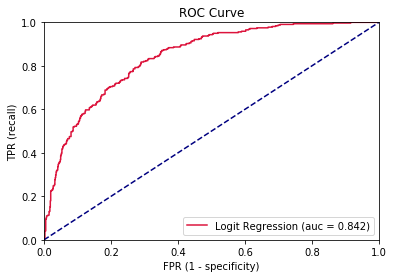

In [28]:
fpr_log, tpr_log, _= roc_curve(y_val, pred_proba_lr)
plot_roc_curve(fpr_log, tpr_log, "Logit Regression", "crimson")

## Decision Tree

In [29]:
# sklearn Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Grid-search CV

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dt_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("tf_clf", clf_dt),
])

param_grid = [
        {"tf_clf__criterion": ["gini"], "tf_clf__max_depth" : [2,3,4,5]},
        {"tf_clf__criterion": ["entropy"], "tf_clf__max_depth" : [2,3,4,5]},
    ]

dt_grid_search = GridSearchCV(dt_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

dt_grid_search.fit(X_train,y_train)

cvres = dt_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]) :
    print(acc, params)

print(dt_grid_search.best_params_)
print(dt_grid_search.best_score_)

0.7628888888888888 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 2}
0.7917777777777778 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 3}
0.7857777777777778 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.786 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 5}
0.7628888888888888 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 2}
0.792 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 3}
0.7855555555555556 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 4}
0.7897777777777778 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 5}
{'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 3}
0.792


### Performance Measure

In [31]:
pred_dt = dt_grid_search.predict(X_val)
pred_proba_dt = dt_grid_search.predict_proba(X_val)[:,1]

print("Accuracy: ", accuracy_score(y_val, pred_dt))
print("AUC: ", roc_auc_score(y_val, pred_proba_dt))
print(classification_report(y_val, pred_dt))
print(confusion_matrix(y_val, pred_dt))

Accuracy:  0.7795555555555556
AUC:  0.8225101899261961
             precision    recall  f1-score   support

          0       0.80      0.93      0.86       807
          1       0.69      0.41      0.51       318

avg / total       0.77      0.78      0.76      1125

[[748  59]
 [189 129]]


#### ROC Curve

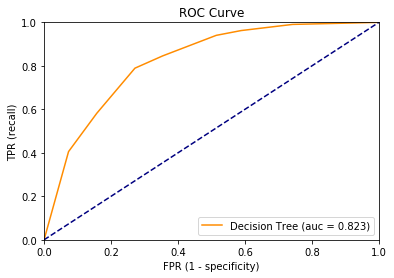

In [32]:
fpr_dt, tpr_dt, _= roc_curve(y_val, pred_proba_dt)
plot_roc_curve(fpr_dt, tpr_dt, "Decision Tree", "darkorange")

* will not plot a decision tree plot for this model since there are too many variables
* code to insert plotted plot in Jupyter is listed below

In [33]:
#from sklearn.model_selection import train_test_split
#from sklearn.dummy import DummyClassifier
#from sklearn.metrics import accuracy_score`

    #X_train, X_test, y_train, y_test = train_test_split(digits.data, y, test_size=0.4, random_state=0)


    #dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    #pred_dummy = dummy.predict(X_test)

    #tree=DecisionTreeClassifier().fit(X_train, y_train)

    #dot_data = StringIO()
    #export_graphviz(tree, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True)
    #graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    #Image(graph.create_png())

* decision tree 시각화하는 함수

## Random Forest

In [34]:
# sklearn Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Grid-search CV

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([
            ("rf_clf", clf_rf),
])

param_grid = [
        {"rf_clf__n_estimators": [10,50,100,500], 
         "rf_clf__criterion": ["gini","entropy"], 
         "rf_clf__min_samples_split": [2,3,4,5]}
    ]

rf_grid_search = GridSearchCV(rf_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

rf_grid_search.fit(X_train,y_train)

cvres = rf_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (rf_grid_search.best_params_)
print (rf_grid_search.best_score_)

0.7868888888888889 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 10}
0.79 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 50}
0.796 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 100}
0.7966666666666666 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 500}
0.782 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 10}
0.7944444444444444 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 50}
0.7982222222222223 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 100}
0.7964444444444444 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 500}
0.7875555555555556 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 4, 'rf_clf__n_estimators': 10}
0.7964444444444444 {'rf_clf__criterion': 'gini', 'rf_cl

### Performance Measure

In [36]:
pred_rf = rf_grid_search.predict(X_val)
pred_proba_rf = rf_grid_search.predict_proba(X_val)[:,1]
print("Accuracy: ", accuracy_score(y_val, pred_rf))
print("AUC: ", roc_auc_score(y_val, pred_proba_rf))
print(classification_report(y_val, pred_rf))
print(confusion_matrix(y_val, pred_rf))

Accuracy:  0.7831111111111111
AUC:  0.8264224981100902
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       807
          1       0.66      0.48      0.56       318

avg / total       0.77      0.78      0.77      1125

[[727  80]
 [164 154]]


#### ROC Curve

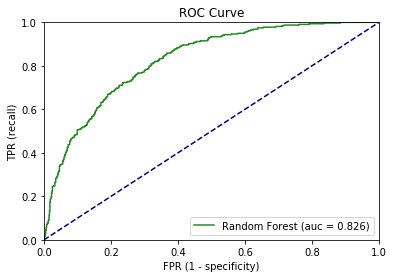

In [37]:
fpr_rf, tpr_rf, _= roc_curve(y_val, pred_proba_rf)
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest", "forestgreen")

### Feature Importances

In [38]:
clf_rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(clf_rf.feature_importances_,
                                  index = X_train.columns,
                                  columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
feature_importances

,Feature Importance
TotalCharges,0.162799
MonthlyCharges,0.161979
tenure,0.133751
Contract_Month-to-month,0.072170
PaymentMethod_Electronic check,0.033661
PaperlessBilling,0.028248
gender,0.026951
tenure_bin_0-1 years,0.026815
Partner,0.024043
OnlineBackup,0.023439


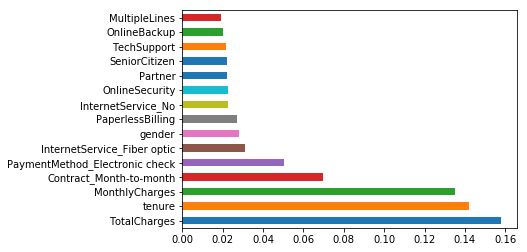

In [69]:
# visualizing top 10 important variables
clf_rf.fit(X_train, y_train)

(pd.Series(clf_rf.feature_importances_, index=X_train.columns)
   .nlargest(15)
   .plot(kind="barh")); 

* 나중에 R로 얘네만 넣고 한번 돌려볼것

## Gradient Boosting

In [40]:
# sklearn Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier()
clf_gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Grid-search CV

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

gb_clf_pipe = Pipeline([
            ("gb_clf", clf_gb),
])

param_grid = [
        {"gb_clf__n_estimators": [10,50,100,500]},
    ]

gb_grid_search = GridSearchCV(gb_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

gb_grid_search.fit(X_train,y_train)

cvres = gb_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (gb_grid_search.best_params_)
print (gb_grid_search.best_score_)

0.7755555555555556 {'gb_clf__n_estimators': 10}
0.808 {'gb_clf__n_estimators': 50}
0.8064444444444444 {'gb_clf__n_estimators': 100}
0.7986666666666666 {'gb_clf__n_estimators': 500}
{'gb_clf__n_estimators': 50}
0.808


### Performance Measure

In [42]:
pred_gb = gb_grid_search.predict(X_val)
pred_proba_gb = gb_grid_search.predict_proba(X_val)[:,1]
print("Accuracy: ", accuracy_score(y_val, pred_gb))
print("AUC: ", roc_auc_score(y_val, pred_proba_gb))
print(classification_report(y_val, pred_gb))
print(confusion_matrix(y_val, pred_gb))

Accuracy:  0.7946666666666666
AUC:  0.8415632087161863
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       807
          1       0.69      0.50      0.58       318

avg / total       0.78      0.79      0.78      1125

[[736  71]
 [160 158]]


#### ROC Curve

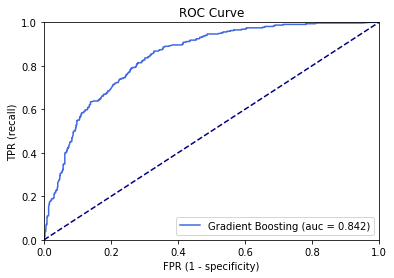

In [43]:
fpr_gb, tpr_gb, _= roc_curve(y_val, pred_proba_gb)
plot_roc_curve(fpr_gb, tpr_gb, "Gradient Boosting", "royalblue")

## XGBoost

In [44]:
# sklearn XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [45]:
xg_model = XGBClassifier(booster="gbtree", seed=725)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=725,
       silent=True, subsample=1)

### Grid-search CV

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

xg_clf_pipe = Pipeline([
            ("xg_clf", xg_model),
])

param_grid = [
        {"xg_clf__base_score": [0.5,0.55,0.6,0.65,0.7], 
         "xg_clf__max_depth": [2,3,4], 
         "xg_clf__n_estimators" : [10,50,70,100]},
    ]

xg_grid_search = GridSearchCV(xg_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

xg_grid_search.fit(X_train,y_train)

cvres = xg_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (xg_grid_search.best_params_)
print (xg_grid_search.best_score_)

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result 

0.7866666666666666 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 10}
0.8026666666666666 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 50}
0.8055555555555556 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 70}
0.8051111111111111 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 100}
0.7982222222222223 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 10}
0.808 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 50}
0.8044444444444444 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 70}
0.8044444444444444 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 100}
0.7971111111111111 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 10}
0.8086666666666666 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 50}
0.8055555555555556 {'

### Performance Measure

In [47]:
pred_xg = xg_grid_search.predict(X_val)
pred_proba_xg = xg_grid_search.predict_proba(X_val)[:,1]
print("Accuracy: ", accuracy_score(y_val, pred_xg))
print("AUC: ", roc_auc_score(y_val, pred_proba_xg))
print(classification_report(y_val, pred_xg))
print(confusion_matrix(y_val, pred_xg))

Accuracy:  0.7982222222222223
AUC:  0.8441662185437173
             precision    recall  f1-score   support

          0       0.82      0.91      0.87       807
          1       0.70      0.51      0.59       318

avg / total       0.79      0.80      0.79      1125

[[737  70]
 [157 161]]


C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



#### ROC Curve

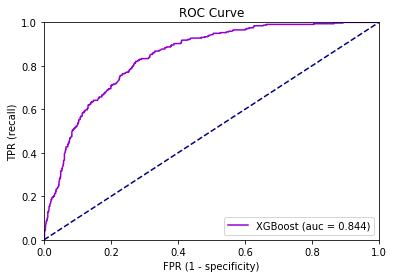

In [48]:
fpr_xg, tpr_xg, _= roc_curve(y_val, pred_proba_xg)
plot_roc_curve(fpr_xg, tpr_xg, "XGBoost", "darkviolet")

### Feature Importances

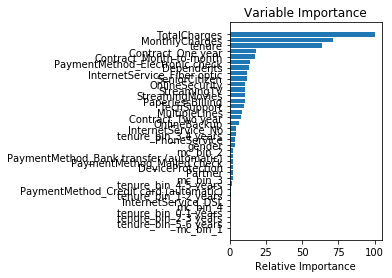

In [49]:
import matplotlib.pyplot as plt
clf_xg = XGBClassifier(booster='gbtree', xg_clf__base_score = 0.55, xg_clf__max_depth = 4, xg_clf__n_estimators = 100, seed = 0)
clf_xg.fit(X_train,y_train)

# plot feature importance
feature_importance = clf_xg.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

## Model Comparison

### Accuracy Comparison

In [50]:
print("LR Accuracy: ", accuracy_score(y_val, pred_lr))
print("DT Accuracy: ", accuracy_score(y_val, pred_dt))
print("RF Accuracy: ", accuracy_score(y_val, pred_rf))
print("GB Accuracy: ", accuracy_score(y_val, pred_gb))
print("XGB Accuracy: ", accuracy_score(y_val, pred_xg))

LR Accuracy:  0.7964444444444444
DT Accuracy:  0.7795555555555556
RF Accuracy:  0.7831111111111111
GB Accuracy:  0.7946666666666666
XGB Accuracy:  0.7982222222222223


### ROC Curve Comparison

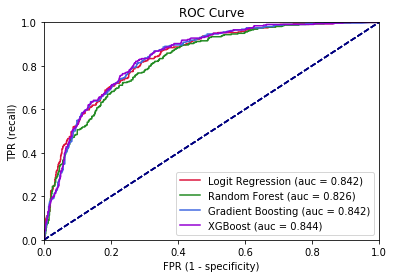

In [51]:
# removed Decision Tree since it overlaps with Random Forest
fpr_log, tpr_log, _= roc_curve(y_val, pred_proba_lr)
plot_roc_curve(fpr_log, tpr_log, "Logit Regression", "crimson")

fpr_rf, tpr_rf, _= roc_curve(y_val, pred_proba_rf)
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest", "forestgreen")

fpr_gb, tpr_gb, _= roc_curve(y_val, pred_proba_gb)
plot_roc_curve(fpr_gb, tpr_gb, "Gradient Boosting", "royalblue")

fpr_xg, tpr_xg, _= roc_curve(y_val, pred_proba_xg)
plot_roc_curve(fpr_xg, tpr_xg, "XGBoost", "darkviolet")

* decisiontree 는 성능이 별로이고 시각화할때 너무 많은 모델들을 시각화하면 겹쳐서 잘 안보이니까 뺐음

# Ensemble

## Voting Classifier

In [66]:
lr_best_model = lr_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
xg_best_model = xg_grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier([("lr", lr_best_model),
                         ("dt", dt_best_model),
                         ("rf", rf_best_model),
                         ("gb", gb_best_model),
                         ("xg", xg_best_model)
                        ])
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Pipelin...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=725,
       silent=True, subsample=1))]))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

### Performance Measure

In [68]:
# hard voting
pred_voting = eclf.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, pred_voting))
print(classification_report(y_val, pred_voting))
print(confusion_matrix(y_val, pred_voting))

Accuracy:  0.7946666666666666
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       807
          1       0.69      0.50      0.58       318

avg / total       0.78      0.79      0.78      1125

[[735  72]
 [159 159]]


C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [54]:
# soft voting
lr_best_model = lr_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
xg_best_model = xg_grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier([("lr", lr_best_model),
                         ("dt", dt_best_model),
                         ("rf", rf_best_model),
                         ("gb", gb_best_model),
                         ("xg", xg_best_model)], voting="soft")
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Pipelin...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=725,
       silent=True, subsample=1))]))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [55]:
pred_voting_soft = eclf.predict(X_val)
pred_proba_voting_soft = eclf.predict_proba(X_val)[:,1]
print("Accuracy: ", accuracy_score(y_val, pred_voting_soft))
print("AUC: ", roc_auc_score(y_val, pred_proba_voting_soft))
print(classification_report(y_val, pred_voting_soft))
print(confusion_matrix(y_val, pred_voting_soft))

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Accuracy:  0.7955555555555556
AUC:  0.8447370882139768
             precision    recall  f1-score   support

          0       0.82      0.91      0.86       807
          1       0.69      0.51      0.58       318

avg / total       0.79      0.80      0.79      1125

[[734  73]
 [157 161]]


#### ROC Curve

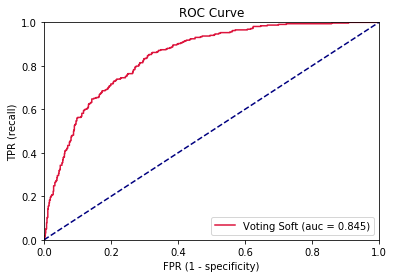

In [56]:
fpr_vts, tpr_vts, _= roc_curve(y_val, pred_proba_voting_soft)
plot_roc_curve(fpr_vts, tpr_vts, "Voting Soft", "crimson")

## Stacking Classifier

In [57]:
from mlxtend.classifier import StackingClassifier
logreg = LogisticRegression()  ## blender or meta-learner
stacking = StackingClassifier(classifiers=[lr_best_model,dt_best_model,rf_best_model,gb_best_model,xg_best_model], 
                              meta_classifier=logreg, 
                              use_probas=False,
                              average_probas=False)
stacking.fit(X_train, y_train)

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), Pipeline(memory=None,...       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=725,
       silent=True, subsample=1))])],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

### Performance Measure

In [58]:
pred_stacking = stacking.predict(X_val)
pred_proba_stacking = stacking.predict_proba(X_val)[:,1]
print("Accuracy: ", accuracy_score(y_val, pred_stacking))
print("AUC: ", roc_auc_score(y_val, pred_proba_stacking))
print(classification_report(y_val, pred_stacking))
print(confusion_matrix(y_val, pred_stacking))

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Accuracy:  0.7857777777777778
AUC:  0.650803114259662
             precision    recall  f1-score   support

          0       0.81      0.91      0.86       807
          1       0.67      0.47      0.56       318

avg / total       0.77      0.79      0.77      1125

[[733  74]
 [167 151]]


C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



#### ROC Curve

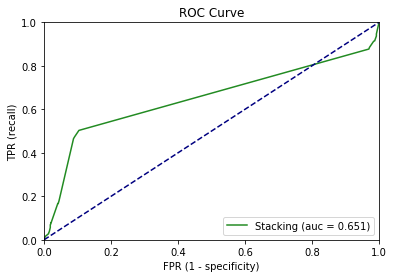

In [59]:
fpr_st, tpr_st, _= roc_curve(y_val, pred_proba_stacking)
plot_roc_curve(fpr_st, tpr_st, "Stacking", "forestgreen")

## ROC Comparison

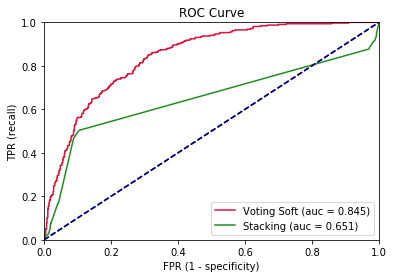

In [60]:
fpr_vts, tpr_vts, _= roc_curve(y_val, pred_proba_voting_soft)
plot_roc_curve(fpr_vts, tpr_vts, "Voting Soft", "crimson")

fpr_st, tpr_st, _= roc_curve(y_val, pred_proba_stacking)
plot_roc_curve(fpr_st, tpr_st, "Stacking", "forestgreen")

# Final Submission

In [61]:
lr_best_model = lr_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
xg_best_model = xg_grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier([("lr", lr_best_model),
                         ("dt", dt_best_model),
                         ("rf", rf_best_model),
                         ("gb", gb_best_model),
                         ("xg", xg_best_model)
                        ])
eclf.fit(X,y)
pred_eclf = eclf.predict(test_df)
pred_proba_eclf = stacking.predict_proba(test_df)[:,1]

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\irie9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



# Final Evaluation

In [62]:
print("Final Accuracy: ", accuracy_score(latent_y, pred_eclf))
print("Final AUC: ", roc_auc_score(latent_y, pred_proba_eclf))
print(classification_report(latent_y, pred_eclf))
print(confusion_matrix(latent_y, pred_eclf))

Final Accuracy:  0.8002842928216063
Final AUC:  0.6606892032311459
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1038
          1       0.66      0.49      0.56       369

avg / total       0.79      0.80      0.79      1407

[[945  93]
 [188 181]]


In [ ]:
#final_df = pd.DataFrame(data={"score":["accuracy_score","roc_auc_score"],
                        #"Logistic regression":[accuracy_score(y_val, pred_lr),roc_auc_score(y_val, pred_proba_lr)],
                        #"Decision tree":[accuracy_score(y_val, pred_dt),roc_auc_score(y_val, pred_proba_dt)],
                        #"Random forest":[accuracy_score(y_val, pred_dt),roc_auc_score(y_val, pred_proba_lr)]})

* 전체 performance 예쁘게 df 로 보여주는 코드

* accuracy 보다는 AUC 를 어떻게하면 더 올릴까
    * 시도해본 방법
        * numeric values binning
        * replacing NaN values

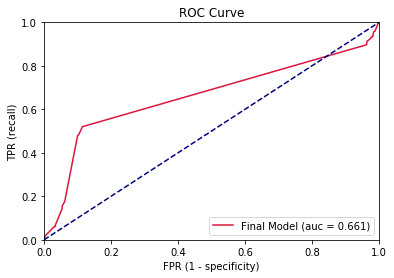

In [70]:
fpr_eclf, tpr_eclf, _= roc_curve(latent_y, pred_proba_eclf)
plot_roc_curve(fpr_eclf, tpr_eclf, "Final Model", "crimson")